## Import needed packages

In [8]:
from astroquery.simbad import Simbad
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from urllib.parse import quote
import numpy as np
from astropy.visualization import (MinMaxInterval, SqrtStretch, AsinhStretch,
                                   ImageNormalize)

%matplotlib inline

## Setup image size, list of objects, list of HiPS

In [10]:
width = 150
height = 150
fov = 0.1

objects = ['M36', 'M16', 'M20', 'M51', 'M 33', 'M 101', 'M1', 'NGC 4676', 'NGC 5614', 'M82', 'M13']
objects = ['M1', 'M82']
hips_list = ['DSS2/red', 'CDS/P/AKARI/FIS/N160', 'PanSTARRS/DR1/z', '2MASS/J', 'AllWISE/W3']
#hips_list = ['http://alasky.u-strasbg.fr/Pan-STARRS/DR1/color-y-i-g/']

nb_obj = len(objects)
nb_hips = len(hips_list)


## Query hips2fits service, save result as FITS file and display cutouts

Saving M1-DSS2_red.fits
Saving M1-CDS_P_AKARI_FIS_N160.fits
Saving M1-PanSTARRS_DR1_z.fits
Saving M1-2MASS_J.fits
Saving M1-AllWISE_W3.fits
Saving M82-DSS2_red.fits
Saving M82-CDS_P_AKARI_FIS_N160.fits
Saving M82-PanSTARRS_DR1_z.fits
Saving M82-2MASS_J.fits
Saving M82-AllWISE_W3.fits


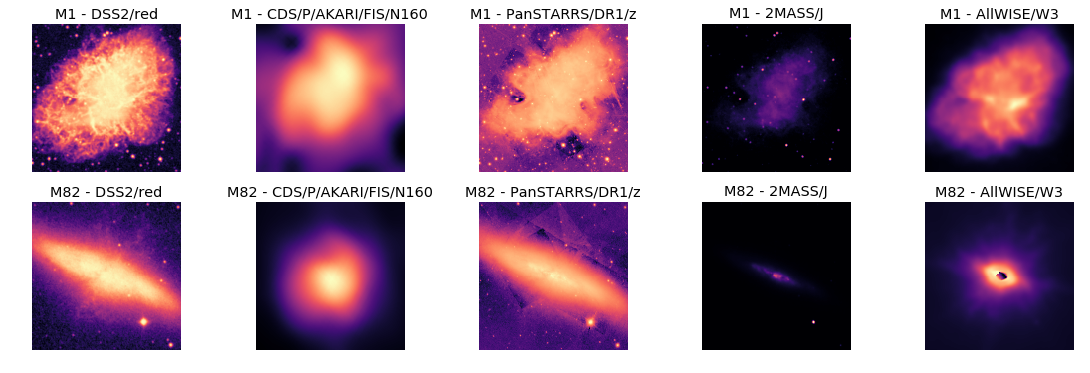

In [11]:
fig, axs = plt.subplots(nb_obj, nb_hips, figsize=(4 * nb_hips, 3* nb_obj), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .2, wspace=.001)

axs = axs.ravel()


i = 0
for obj in objects:
    for hips in hips_list:
        axs[i].set_axis_off()

        axs[i].set_title('{} - {}'.format(obj, hips))
        sc = SkyCoord.from_name(obj)
        ra = sc.icrs.ra.deg
        dec = sc.icrs.dec.deg
        url = 'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips={}&width={}&height={}&fov={}&projection=TAN&coordsys=icrs&ra={}&dec={}'.format(quote(hips), width, height, fov, ra, dec)
    
        hdu = fits.open(url)
    
        file_name = '{}-{}.fits'.format(obj, hips.replace('/', '_'))
        hdu.writeto(file_name, overwrite=True)
        print('Saving {}'.format(file_name))
        im = hdu[0].data
        norm = ImageNormalize(im, interval=MinMaxInterval(),
                      stretch=AsinhStretch())
        axs[i].imshow(im, cmap='magma', norm=norm, origin='lower')
        
        i += 1
        
